# TRAVEL DATA ANALYSIS

In [1]:
# importing the packages--
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# reading the data file--
def read_data():
    data=pd.read_excel("C:/ANKITA/ASSIGNMENTS/Day 27 - 11th June/Assignments/ARIMA/travel_data.xlsx")
    return data

In [3]:
# calling the function--
data= read_data()
print(data.head(2))

        Date  Distance  AvgSpeed
0 2012-01-06        51        78
1 2012-01-06        52        82


In [4]:
# copying the data--
data.copy()
data

,Date,Distance,AvgSpeed
0,2012-01-06,51,78
1,2012-01-06,52,82
2,2012-01-04,51,82
3,2012-01-04,49,74
4,2012-01-03,51,83
...,...,...,...
200,2011-07-18,55,50
201,2011-07-14,51,76
202,2011-07-13,52,58
203,2011-07-12,53,62


In [5]:
# data analysis--
data.head()

,Date,Distance,AvgSpeed
0,2012-01-06,51,78
1,2012-01-06,52,82
2,2012-01-04,51,82
3,2012-01-04,49,74
4,2012-01-03,51,83


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      205 non-null    datetime64[ns]
 1   Distance  205 non-null    int64         
 2   AvgSpeed  205 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.9 KB


In [7]:
print(data.dtypes)

Date        datetime64[ns]
Distance             int64
AvgSpeed             int64
dtype: object


In [8]:
data.describe()

,Distance,AvgSpeed
count,205.000000,205.000000
mean,50.985366,74.541463
std,1.366540,11.394206
min,48.000000,38.000000
25%,51.000000,69.000000
50%,51.000000,74.000000
75%,52.000000,80.000000
max,60.000000,108.000000


In [9]:
# checking the missing values--
data.isnull().sum()

Date        0
Distance    0
AvgSpeed    0
dtype: int64

In [10]:
data.shape

(205, 3)

In [11]:
data.corr()

,Distance,AvgSpeed
Distance,1.000000,0.035456
AvgSpeed,0.035456,1.000000


# Exploratory Data Analysis

<Axes: >

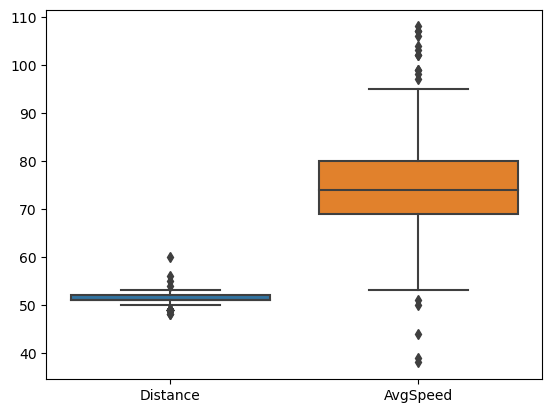

In [12]:
# checking the outliers--
sns.boxplot(data)

Text(0.5, 1.0, 'Distance vs AvgSpeed')

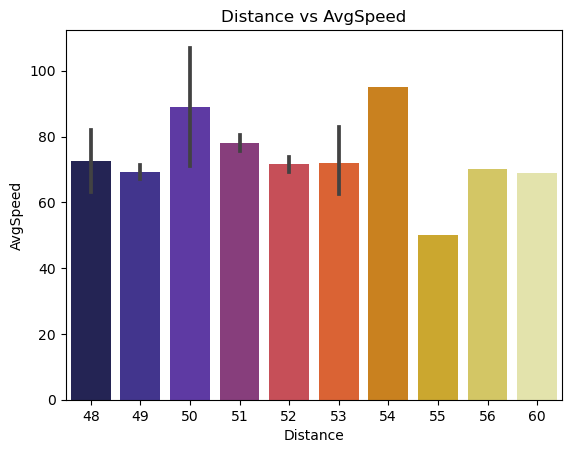

In [13]:
sns.barplot(x="Distance",y="AvgSpeed",data=data,palette='CMRmap')
plt.title("Distance vs AvgSpeed")

Text(0.5, 1.0, 'Count of Distance')

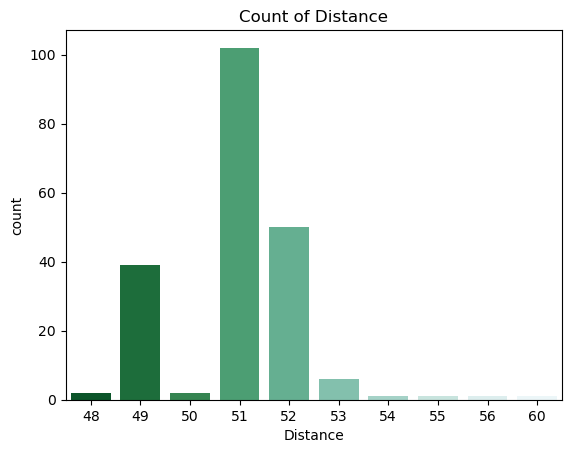

In [14]:
sns.countplot(x="Distance",data=data,palette='BuGn_r')
plt.title("Count of Distance")

Text(0.5, 1.0, 'Count of AvgSpeed')

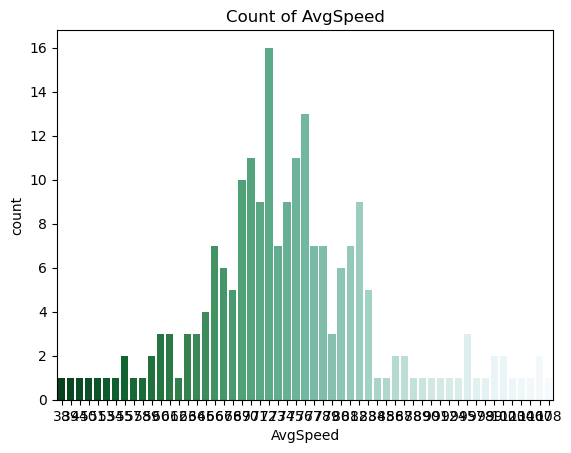

In [15]:
sns.countplot(x="AvgSpeed",data=data,palette='BuGn_r')
plt.title("Count of AvgSpeed")

Text(0.5, 1.0, 'Date vs Distance')

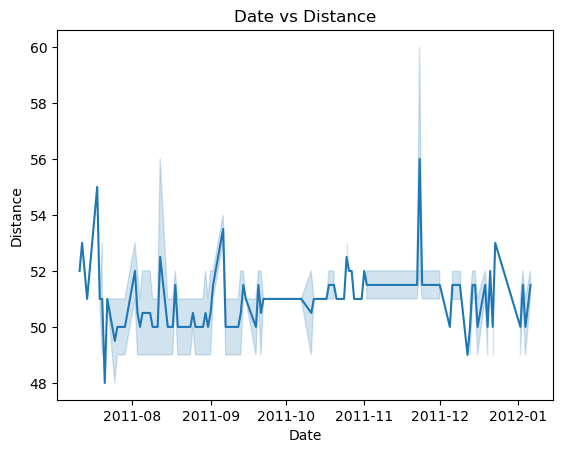

In [16]:
sns.lineplot(x="Date",y=data["Distance"],data=data)
plt.title("Date vs Distance")

Text(0.5, 1.0, 'Date vs AvgSpeed')

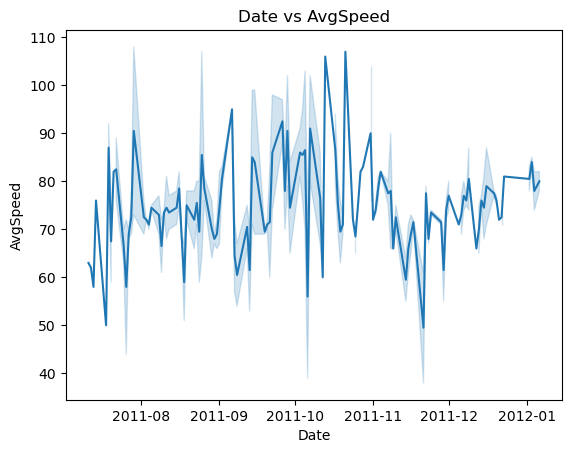

In [17]:
sns.lineplot(x="Date",y=data["AvgSpeed"],data=data)
plt.title("Date vs AvgSpeed")

Text(0.5, 1.0, 'AvgSpeed vs Distance')

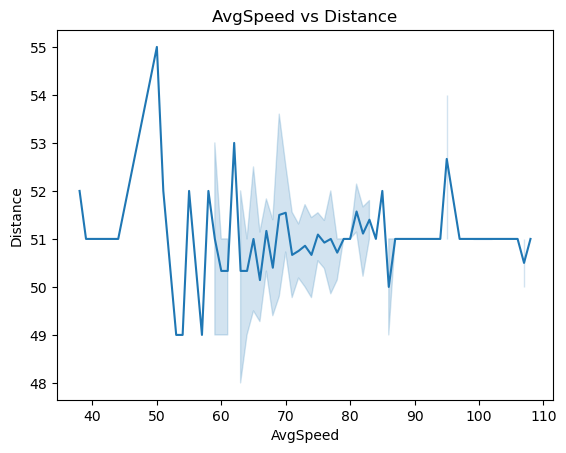

In [18]:
sns.lineplot(x="AvgSpeed",y=data["Distance"],data=data)
plt.title("AvgSpeed vs Distance")

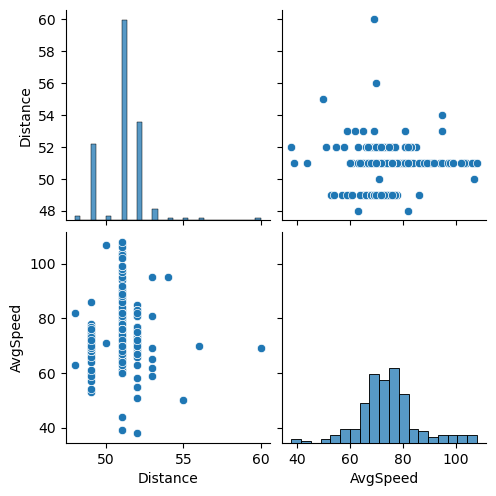

In [19]:
sns.pairplot(data)

<Axes: >

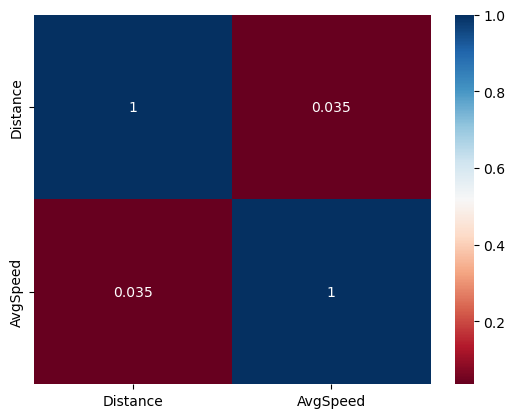

In [20]:
sns.heatmap(data [['Date', 'Distance', 'AvgSpeed']].corr(),annot=True,cmap="RdBu")

In [21]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Moving Average Models for Distance

In [22]:
data['SMA_Distance'] = data['Distance'].rolling(window=3).mean()
data['CMA_Distance'] = data['Distance'].expanding().mean()
data['EMA_Distance'] = data['Distance'].ewm(span=3,adjust=False).mean()

### Simple Moving Average

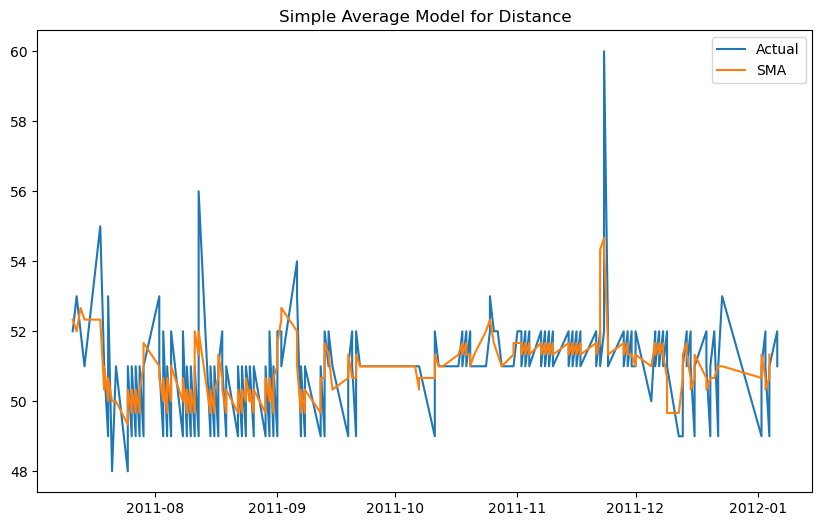

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Distance'], label='Actual')
plt.plot(data['Date'], data['SMA_Distance'], label='SMA')
plt.title('Simple Average Model for Distance')
plt.legend()

### Cumulative Moving Average

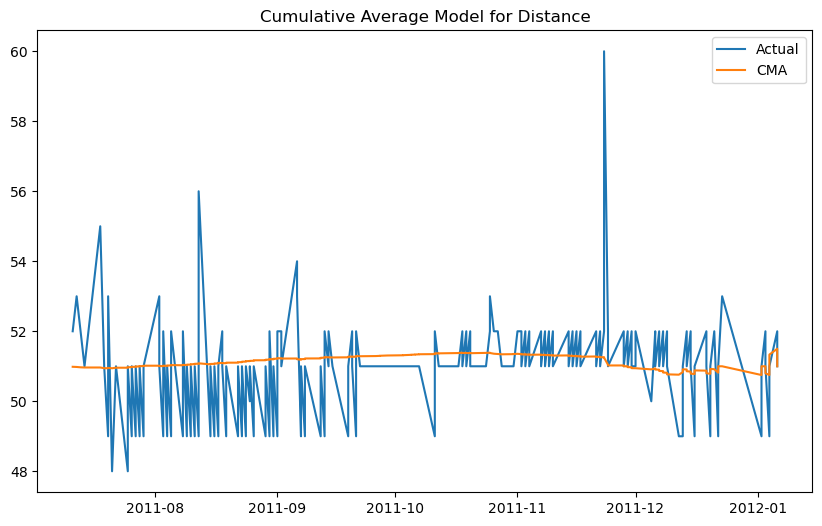

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Distance'], label='Actual')
plt.plot(data['Date'], data['CMA_Distance'], label='CMA')
plt.title('Cumulative Average Model for Distance')
plt.legend()

### Exponential Moving Average

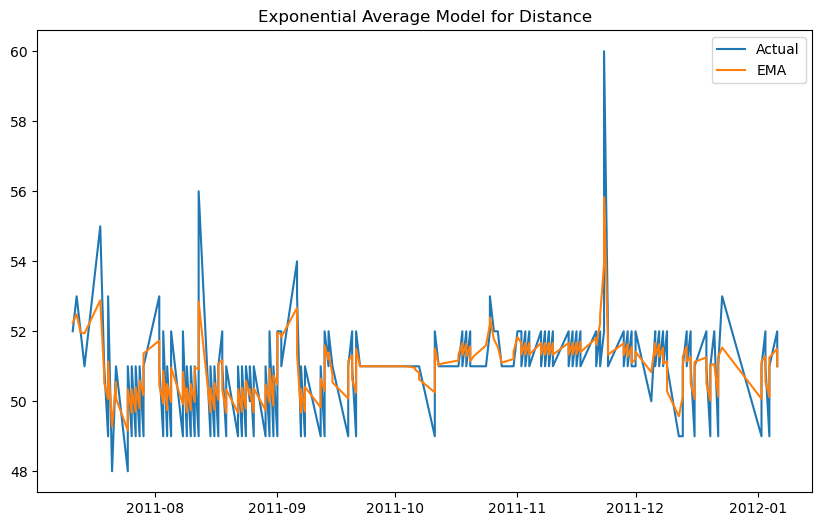

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Distance'], label='Actual')
plt.plot(data['Date'], data['EMA_Distance'], label='EMA')
plt.title('Exponential Average Model for Distance')
plt.legend()

# Moving Average Models for AvgSpeed

In [26]:
data['SMA_AvgSpeed'] = data['AvgSpeed'].rolling(window=3).mean()
data['CMA_AvgSpeed'] = data['AvgSpeed'].expanding().mean()
data['EMA_AvgSpeed'] = data['AvgSpeed'].ewm(span=3,adjust=False).mean()

### Simple Moving Average

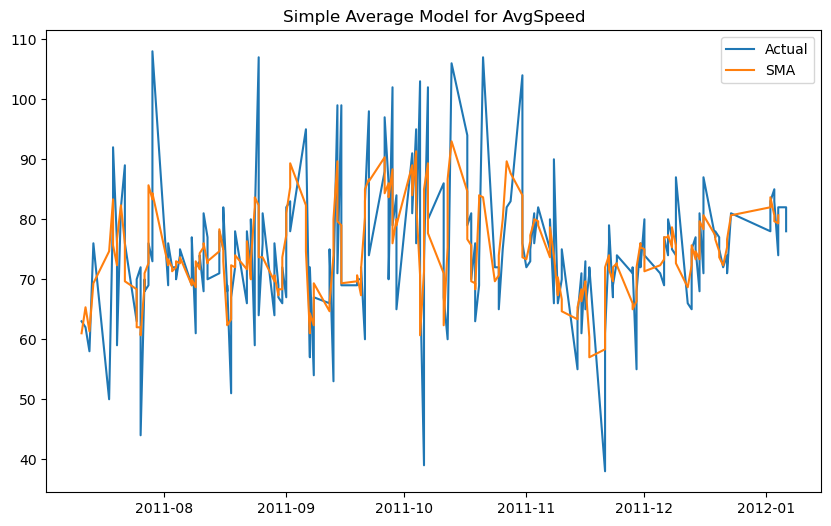

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['AvgSpeed'], label='Actual')
plt.plot(data['Date'], data['SMA_AvgSpeed'], label='SMA')
plt.title('Simple Average Model for AvgSpeed')
plt.legend()

### Cumulative Moving Average

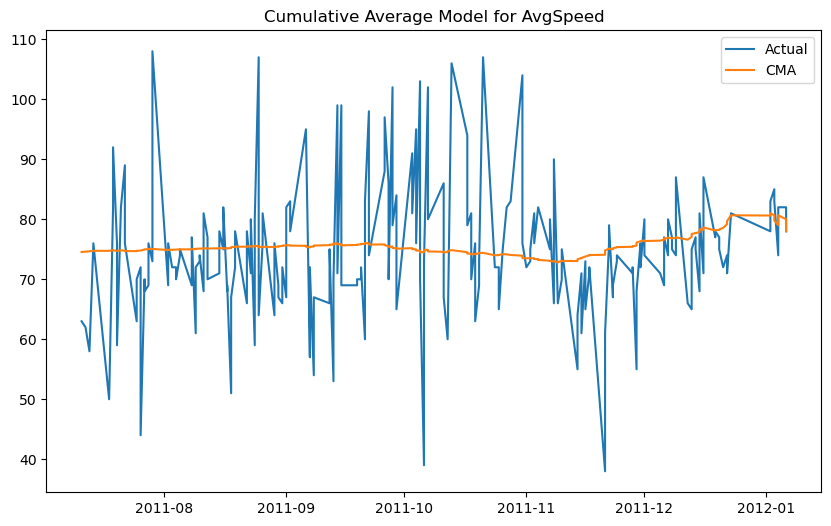

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['AvgSpeed'], label='Actual')
plt.plot(data['Date'], data['CMA_AvgSpeed'], label='CMA')
plt.title('Cumulative Average Model for AvgSpeed')
plt.legend()

### Exponential Moving Average

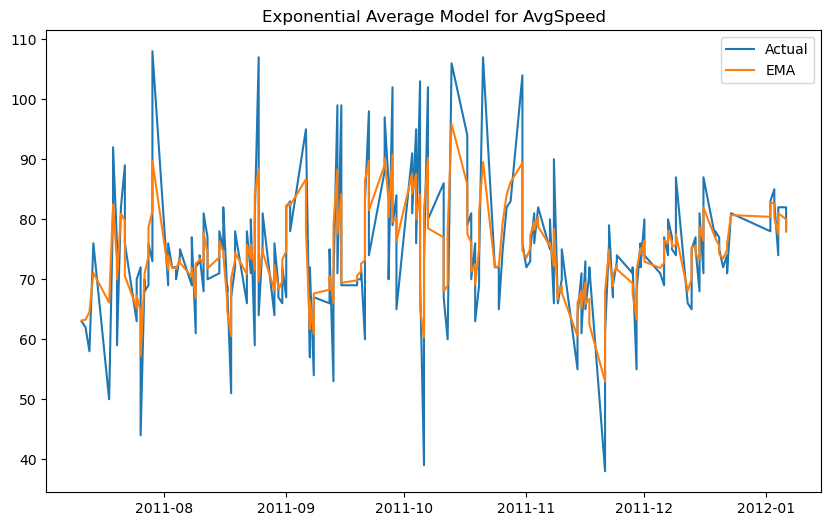

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['AvgSpeed'], label='Actual')
plt.plot(data['Date'], data['EMA_AvgSpeed'], label='EMA')
plt.title('Exponential Average Model for AvgSpeed')
plt.legend()

# Timeseries Model for Distance

In [30]:
### predicting the distance travelled in the given date--
ts_distance = data[['Date', 'Distance']].set_index('Date')
model_distance = ARIMA(ts_distance, order=(1, 0, 0))
model_fit_distance = model_distance.fit()
pred_distance = model_fit_distance.predict(start_date='01-02-2012', end_date='29-02-2012')
pred_distance

Date
2012-01-06    50.985049
2012-01-06    50.983990
2012-01-04    50.913120
2012-01-04    50.983990
2012-01-03    51.125728
                ...    
2011-07-18    50.983990
2011-07-14    50.700512
2011-07-13    50.983990
2011-07-12    50.913120
2011-07-11    50.842251
Name: predicted_mean, Length: 205, dtype: float64

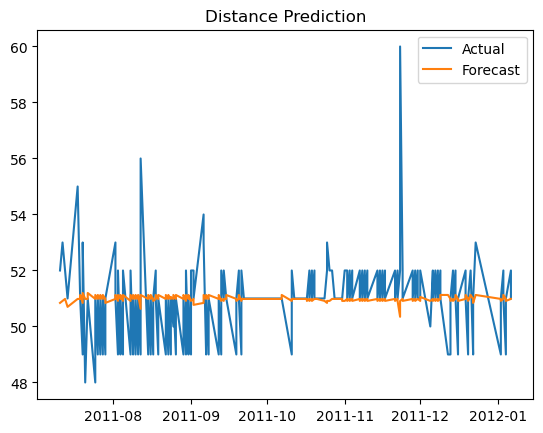

In [31]:
### ploting prediction model against the actual distance in graph--
plt.plot(ts_distance.index, ts_distance, label='Actual')
plt.plot(pred_distance.index, pred_distance, label='Forecast')
plt.title('Distance Prediction')
plt.legend()

From the Prediction Model of Timeseries, the predicted distance shows the average of around 50-52 km against the actual distance i.e. 48-60 km.

# Timeseries Model for AvgSpeed

In [32]:
ts_avgspeed = data[['Date', 'AvgSpeed']].set_index('Date')
model_avgspeed = ARIMA(ts_avgspeed, order=(1, 0, 0))
model_fit_avgspeed = model_avgspeed.fit()
pred_avgspeed = model_fit_avgspeed.predict(start_date='01-02-2012', end_date='29-02-2012')
pred_avgspeed

Date
2012-01-06    74.538686
2012-01-06    74.985141
2012-01-04    75.501078
2012-01-04    75.501078
2012-01-03    74.469204
                ...    
2011-07-18    75.501078
2011-07-14    71.373581
2011-07-13    74.727173
2011-07-12    72.405456
2011-07-11    72.921393
Name: predicted_mean, Length: 205, dtype: float64

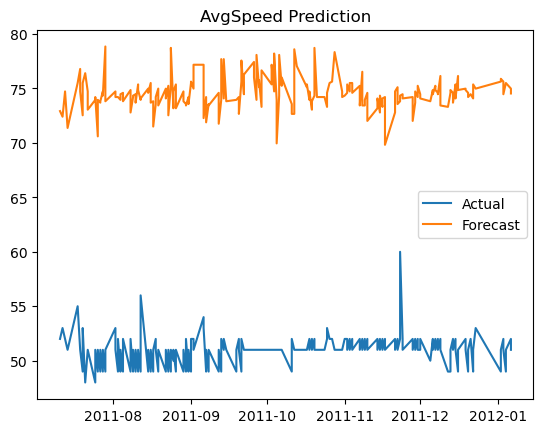

In [34]:
### ploting prediction of AvgSpeed against the actual AvgSpeed in graph--
plt.plot(ts_avgspeed.index, ts_distance, label='Actual')
plt.plot(pred_avgspeed.index, pred_avgspeed, label='Forecast')
plt.title('AvgSpeed Prediction')
plt.legend()

From the Prediction Model of Timeseries, the prediction shows the AvgSpeed is around 70-80 km/hr and the actual AvgSpeed is around 40-60 km/hr.